# Food Demand Forecasting

## Genpact Machine Learning Hackathon

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

- Historical data of demand for a product-center combination (Weeks: 1 to 145)
- Product(Meal) features such as category, sub-category, current price and discount
- Information for fulfillment center like center area, city information etc.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
df_train = pd.read_csv("train.csv")
df_centre = pd.read_csv("fulfilment_center_info.csv")
df_meal = pd.read_csv("meal_info.csv")
df_test = pd.read_csv("test_QoiMO9B.csv")

In [3]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
df_centre.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
df_centre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [7]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
df_meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


## Merge the Dataset

In [11]:
# Merging train data set into a single dataframe.

In [12]:
df_merge1 = df_train.merge(df_meal, how='left', on='meal_id')
df_merge1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian


In [13]:
df1_train =df_merge1.merge(df_centre, how='left', on='center_id')
df1_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [14]:
# Merged Test data

In [15]:
df_merge2 = df_test.merge(df_meal, how='left', on='meal_id')
df_merge2

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,Desert,Indian
32569,1039516,155,61,2304,483.09,483.09,0,0,Desert,Indian
32570,1158107,155,61,2664,322.07,323.07,0,0,Salad,Italian
32571,1444235,155,61,2569,322.07,323.07,0,0,Salad,Italian


In [16]:
df1_test =df_merge2.merge(df_centre, how='left', on='center_id')
df1_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32569,1039516,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32570,1158107,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5
32571,1444235,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5


## Data Understanding

In [17]:
df1_train.shape

(456548, 15)

In [18]:
df1_train.size

6848220

In [19]:
df1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1.250096e+06,144354.822378,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,7.476877e+01,41.524956,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,8.210580e+01,45.975046,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2.024337e+03,547.420920,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,3.322389e+02,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,3.541566e+02,160.715914,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,8.115247e-02,0.273069,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,1.091999e-01,0.311890,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,2.618728e+02,395.922798,13.00,54.00,136.00,324.00,24299.00
city_code,456548.0,6.015534e+02,66.195914,456.00,553.00,596.00,651.00,713.00


In [20]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

## Duplicate Removal

In [21]:
# Checking for duplicate rows
df1_train.duplicated().sum()

np.int64(0)

In [22]:
# Zero duplicate rows found

In [23]:
# Checking for duplicate columns
df1_train.columns.duplicated().sum()

np.int64(0)

In [24]:
# Zero duplicate columns found

## Checking for Missing Values

In [25]:
df1_train.isna().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0
category,0


In [26]:
# No missing values found

## Outlier Handling

In [27]:
# Seperating numerical and categorical columns
num_df = df1_train.select_dtypes(include="number")
cat_df = df1_train.select_dtypes(include="object_")

In [28]:
num_cols = num_df.columns.tolist()
cat_cols = cat_df.columns.tolist()
print("Numerical Columns: {}".format(num_cols))
print("Categorical Columns: {}".format(cat_cols))

Numerical Columns: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area']
Categorical Columns: ['category', 'cuisine', 'center_type']


In [29]:
num_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0


In [30]:
cat_df.head()

,category,cuisine,center_type
0,Beverages,Thai,TYPE_C
1,Beverages,Thai,TYPE_C
2,Beverages,Thai,TYPE_C
3,Beverages,Indian,TYPE_C
4,Beverages,Indian,TYPE_C


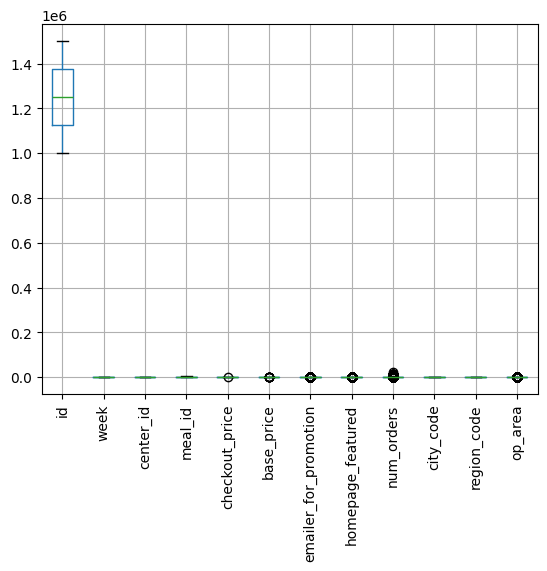

In [31]:
num_df.boxplot()
plt.xticks(rotation=90)
plt.show()

### Outlier handling using IQR

In [32]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [33]:
for col in num_cols:
 num_df[col] = remove_outliers(num_df, col)

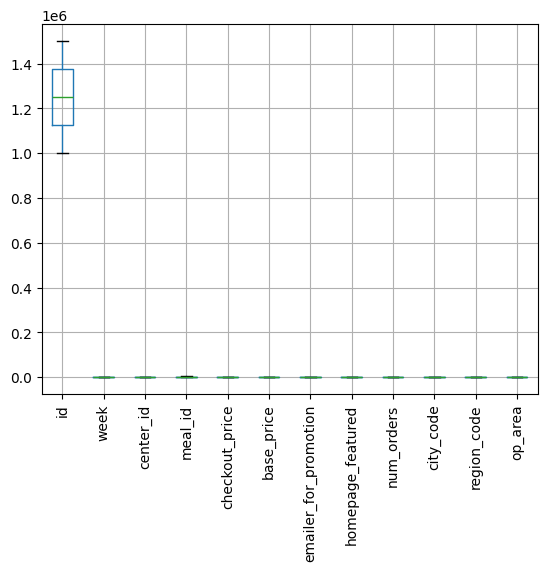

In [34]:
num_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [35]:
# Seperating numerical and categorical attributes for easy analysis
num_attri = df1_train[["checkout_price","base_price","num_orders","op_area"]]
cat_attri = df1_train[["id","week","center_id","meal_id","emailer_for_promotion","homepage_featured","city_code","region_code","category","cuisine","center_type"]]

## Feature Encoding

In [36]:
cat_df.describe()

,category,cuisine,center_type
count,456548,456548,456548
unique,14,4,3
top,Beverages,Italian,TYPE_A
freq,127890,122925,262881


In [37]:
# Frequency encoding for category column on training data

In [38]:
category_frequency = df1_train["category"].value_counts(normalize= True)
df1_train['category_encoded'] = df1_train['category'].map(category_frequency)
df1_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,category_encoded
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,0.280124
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0,0.280124
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0,0.280124
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0,0.280124
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0,0.280124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5,0.064164
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5,0.064164
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5,0.062554
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5,0.062554


In [39]:
df1_train = df1_train.drop('category',axis= 1)

In [40]:
# Frequency encoding for category column on testing data

In [41]:
category_frequency1 = df1_test["category"].value_counts(normalize= True)
df1_test['category_encoded'] = df1_test['category'].map(category_frequency1)
df1_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,category_encoded
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0,0.272956
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0,0.272956
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0,0.272956
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0,0.272956
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0,0.272956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A,4.5,0.064870
32569,1039516,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A,4.5,0.064870
32570,1158107,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5,0.070887
32571,1444235,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5,0.070887


In [42]:
df1_test = df1_test.drop('category',axis= 1)

In [43]:
cat_df["cuisine"].value_counts()

,count
cuisine,
Italian,122925
Thai,118216
Indian,112612
Continental,102795


In [44]:
# Onehot Encoding for cuisine type in training data
df1_train = pd.get_dummies(df1_train, columns=['cuisine'],dtype= int, prefix='cuisine', drop_first=True)
df1_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,0.280124,0,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,0.280124,0,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,0.280124,0,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,0.280124,1,0,0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,0.280124,1,0,0


In [45]:
# Onehot Encoding for cuisine type in testing data
df1_test = pd.get_dummies(df1_test, columns=['cuisine'],dtype= int, prefix='cuisine', drop_first=True)
df1_test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,0.272956,0,0,1
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,0.272956,0,0,1
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,0.272956,0,0,1
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,0.272956,1,0,0
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,0.272956,1,0,0


In [46]:
cat_df["center_type"].value_counts()

,count
center_type,
TYPE_A,262881
TYPE_C,99593
TYPE_B,94074


In [47]:
# Onehot Encoding for center_type for training
df1_train = pd.get_dummies(df1_train, columns=['center_type'],dtype= int, prefix='Center', drop_first=True)
df1_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0,0.280124,0,0,1,0,1
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.0,0.280124,0,0,1,0,1
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.0,0.280124,0,0,1,0,1
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.0,0.280124,1,0,0,0,1
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.0,0.280124,1,0,0,0,1


In [48]:
# Onehot Encoding for center_type for testing
df1_test = pd.get_dummies(df1_test, columns=['center_type'],dtype= int, prefix='Center', drop_first=True)
df1_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2.0,0.272956,0,0,1,0,1
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,2.0,0.272956,0,0,1,0,1
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,2.0,0.272956,0,0,1,0,1
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,2.0,0.272956,1,0,0,0,1
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,2.0,0.272956,1,0,0,0,1


## Feature Scaling

In [49]:
# Min Max scaling in training
min_scaler = MinMaxScaler()
numerical_colms1 = ['checkout_price','base_price','op_area',"week"]
df1_train[numerical_colms1] = min_scaler.fit_transform(df1_train[numerical_colms1])
df1_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,1379560,0.0,55,1885,0.155056,0.119543,0,0,177,647,56,0.180328,0.280124,0,0,1,0,1
1,1466964,0.0,55,1993,0.155056,0.099245,0,0,270,647,56,0.180328,0.280124,0,0,1,0,1
2,1346989,0.0,55,2539,0.152774,0.099282,0,0,189,647,56,0.180328,0.280124,0,0,1,0,1
3,1338232,0.0,55,2139,0.389818,0.471292,0,0,54,647,56,0.180328,0.280124,1,0,0,0,1
4,1448490,0.0,55,2631,0.278617,0.230787,0,0,40,647,56,0.180328,0.280124,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,1.0,61,1543,0.557303,0.528708,0,0,68,473,77,0.590164,0.064164,1,0,0,0,0
456544,1062036,1.0,61,2304,0.554987,0.526242,0,0,42,473,77,0.590164,0.064164,1,0,0,0,0
456545,1110849,1.0,61,2664,0.271875,0.327677,0,0,501,473,77,0.590164,0.062554,0,1,0,0,0
456546,1147725,1.0,61,2569,0.278617,0.318145,0,0,729,473,77,0.590164,0.062554,0,1,0,0,0


In [50]:
# min max scaling in testing
min_scaler1 = MinMaxScaler()
numerical_colms2 = ['checkout_price','base_price','op_area',"week"]
df1_test[numerical_colms1] = min_scaler1.fit_transform(df1_test[numerical_colms1])
df1_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,1028232,0.0,55,1885,0.086266,0.068274,0,0,647,56,0.180328,0.272956,0,0,1,0,1
1,1127204,0.0,55,1993,0.088178,0.068274,0,0,647,56,0.180328,0.272956,0,0,1,0,1
2,1212707,0.0,55,2539,0.085338,0.068303,0,0,647,56,0.180328,0.272956,0,0,1,0,1
3,1082698,0.0,55,2631,0.090005,0.071117,0,0,647,56,0.180328,0.272956,1,0,0,0,1
4,1400926,0.0,55,1248,0.091831,0.072984,0,0,647,56,0.180328,0.272956,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,1.0,61,1543,0.396081,0.385829,0,0,473,77,0.590164,0.064870,1,0,0,0,0
32569,1039516,1.0,61,2304,0.397037,0.384852,0,0,473,77,0.590164,0.064870,1,0,0,0,0
32570,1158107,1.0,61,2664,0.243057,0.228488,0,0,473,77,0.590164,0.070887,0,1,0,0,0
32571,1444235,1.0,61,2569,0.243057,0.228488,0,0,473,77,0.590164,0.070887,0,1,0,0,0


In [51]:
# Dropping unnecesary columns
df1_train = df1_train.drop(["id","center_id","meal_id","city_code","region_code"], axis = 1)

In [52]:
df1_train.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,0.0,0.155056,0.119543,0,0,177,0.180328,0.280124,0,0,1,0,1
1,0.0,0.155056,0.099245,0,0,270,0.180328,0.280124,0,0,1,0,1
2,0.0,0.152774,0.099282,0,0,189,0.180328,0.280124,0,0,1,0,1
3,0.0,0.389818,0.471292,0,0,54,0.180328,0.280124,1,0,0,0,1
4,0.0,0.278617,0.230787,0,0,40,0.180328,0.280124,1,0,0,0,1


In [53]:
# Dropping unnecesary columns in testing data
df1_test = df1_test.drop(["id","center_id","meal_id","city_code","region_code"], axis = 1)

In [54]:
df1_test.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,category_encoded,cuisine_Indian,cuisine_Italian,cuisine_Thai,Center_TYPE_B,Center_TYPE_C
0,0.0,0.086266,0.068274,0,0,0.180328,0.272956,0,0,1,0,1
1,0.0,0.088178,0.068274,0,0,0.180328,0.272956,0,0,1,0,1
2,0.0,0.085338,0.068303,0,0,0.180328,0.272956,0,0,1,0,1
3,0.0,0.090005,0.071117,0,0,0.180328,0.272956,1,0,0,0,1
4,0.0,0.091831,0.072984,0,0,0.180328,0.272956,1,0,0,0,1


<Axes: >

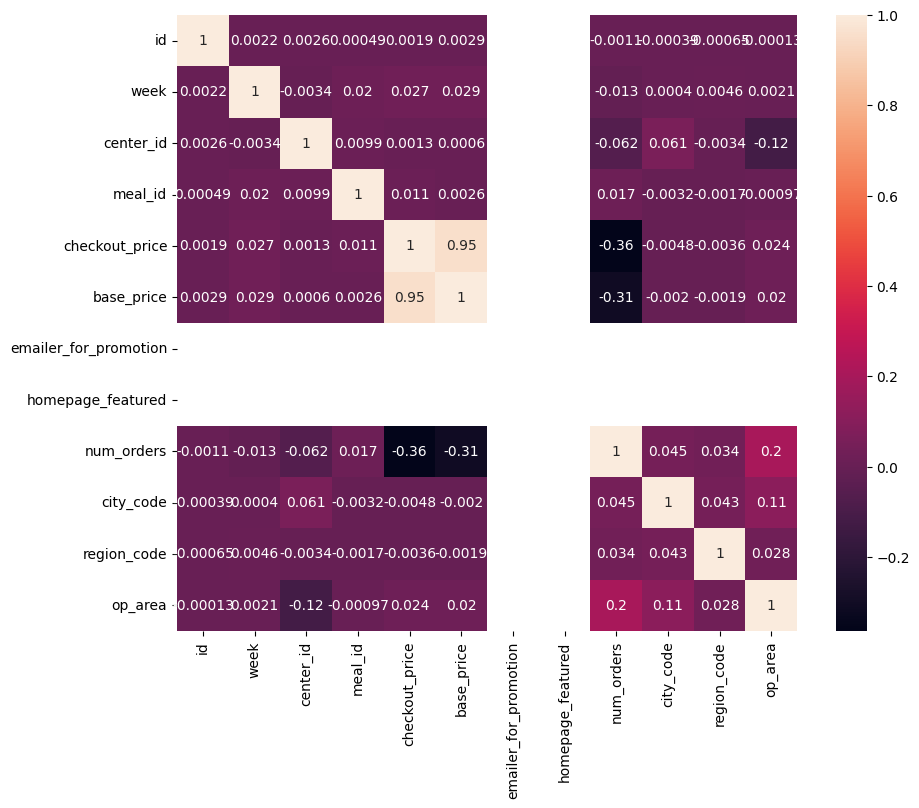

In [67]:
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(),annot= True)

## Seperate Features and Labels

In [56]:
y_train = df1_train["num_orders"]
X_train = df1_train.drop(["num_orders"], axis = 1)
X_test = df1_test

# Model training

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()

In [65]:
Linear_model.fit(X_train,y_train)
y_pred = Linear_model.predict(X_test)

In [58]:
y_pred

array([171.55038656, 170.76368135, 171.9162464 , ..., 428.1756275 ,
       428.1756275 , 470.50603939])

In [59]:
result_df = pd.DataFrame(y_pred)
result_df

,0
0,171.550387
1,170.763681
2,171.916246
3,284.091059
4,282.340686
...,...
32568,224.990950
32569,225.120671
32570,428.175627
32571,428.175627


In [60]:
Id = df_test["id"]
Id

,id
0,1028232
1,1127204
2,1212707
3,1082698
4,1400926
...,...
32568,1250239
32569,1039516
32570,1158107
32571,1444235


In [61]:
result_df1 = pd.concat([Id,result_df],axis = 1)

In [66]:
result_df1

,id,0
0,1028232,171.550387
1,1127204,170.763681
2,1212707,171.916246
3,1082698,284.091059
4,1400926,282.340686
...,...,...
32568,1250239,224.990950
32569,1039516,225.120671
32570,1158107,428.175627
32571,1444235,428.175627


In [63]:
result = result_df1.to_csv("final_result.csv")